In [14]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image  # PIL
import numpy  # http://www.scipy.org

import pywt


import utils.getstim as getstim

#jupyter notebook settings
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'dpi' : 200} #plotting pretty

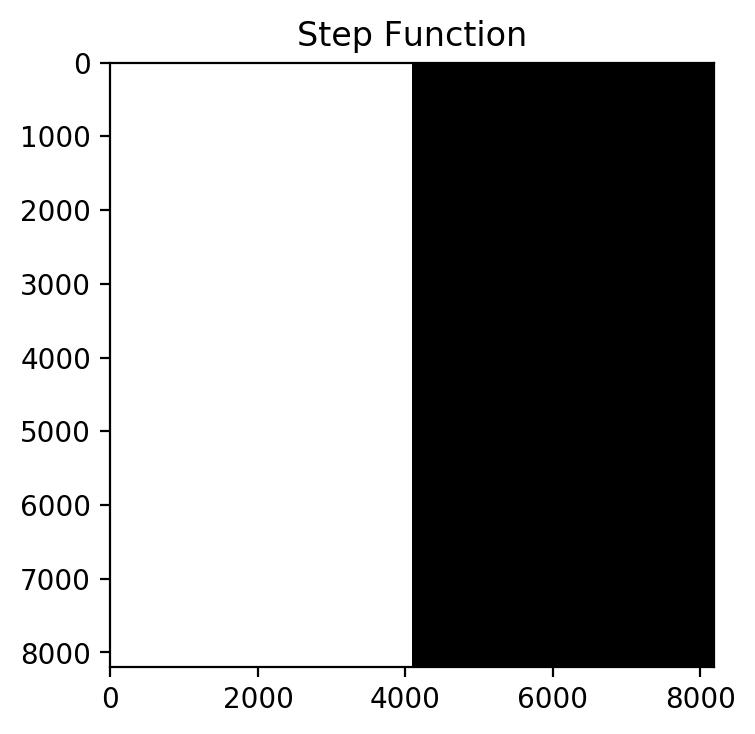

In [2]:
#make step function 
stim_px_w = 2**13
stim_px_h = 2**13

# Step function
stim_step = getstim.step_stim(stim_px_w,stim_px_h,orient=1, stepdn=True)
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(stim_step, cmap='Greys_r')
ax.set_title('Step Function')
plt.show()


In [15]:
def load_image(path, mode=None, size=None):
    """Load image"""
    im = Image.open(path)

    if im.mode not in ('L', 'P', 'RGB', 'CMYK'):
        raise TypeError("Image mode must be 'L', 'P', 'RGB' or 'CMYK'")

    if mode is not None:
        if mode == 'P':
            raise ValueError("Mode must be 'L', 'RGB' or 'CMYK'")
        im = im.convert(mode)
    elif im.mode == 'P':
        im = im.convert('RGB')

    if size is not None and im.size != size:
        im = im.resize(size, Image.ANTIALIAS)
    return im


In [20]:
trail = load_image('./ims/trail.jpg')
trail_gray = trail.convert('L')
area = (0, 0, 500, 500)
cropped_img = trail_gray.crop(area)
trail_gray_array = np.array(cropped_img)

In [26]:
def cos_filter(image):
    #raised cosyne window on image to avoid border artifacts
    (dim1,dim2) = np.shape(image)
    oneD = np.hanning(dim1)
    oneD = np.tile(oneD,(dim2,1)).T
    twoD = np.hanning(dim2)
    twoD = np.tile(twoD,(dim1,1))
    cosfilter = oneD*(twoD)
    filtered_im = image*cosfilter
    return filtered_im

In [59]:
#pywt.wavelist(kind='discrete')
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

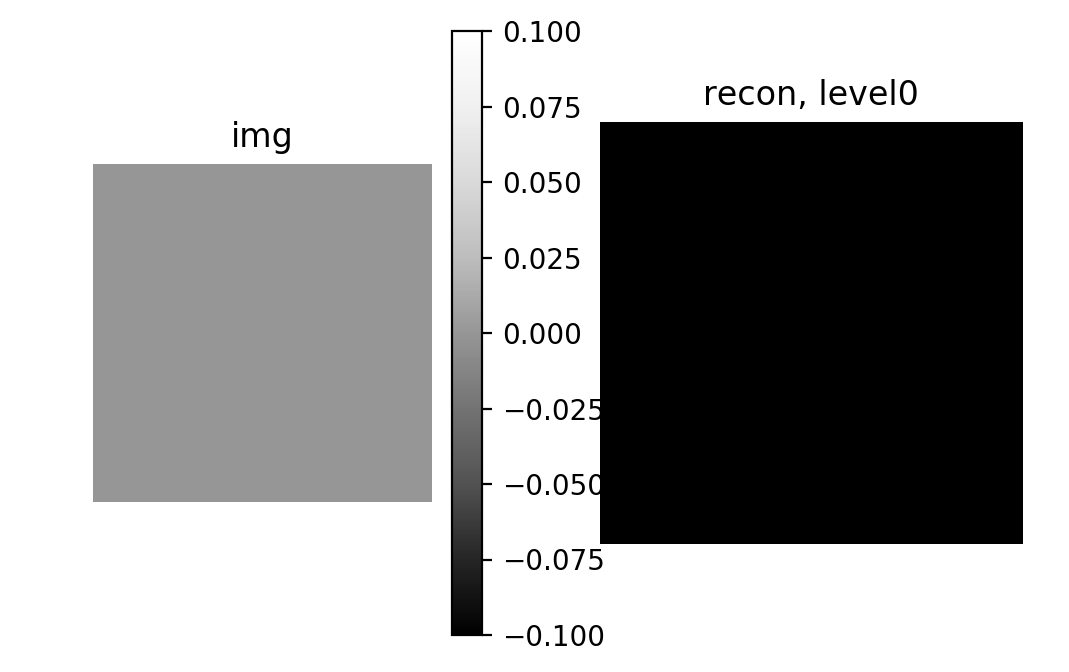

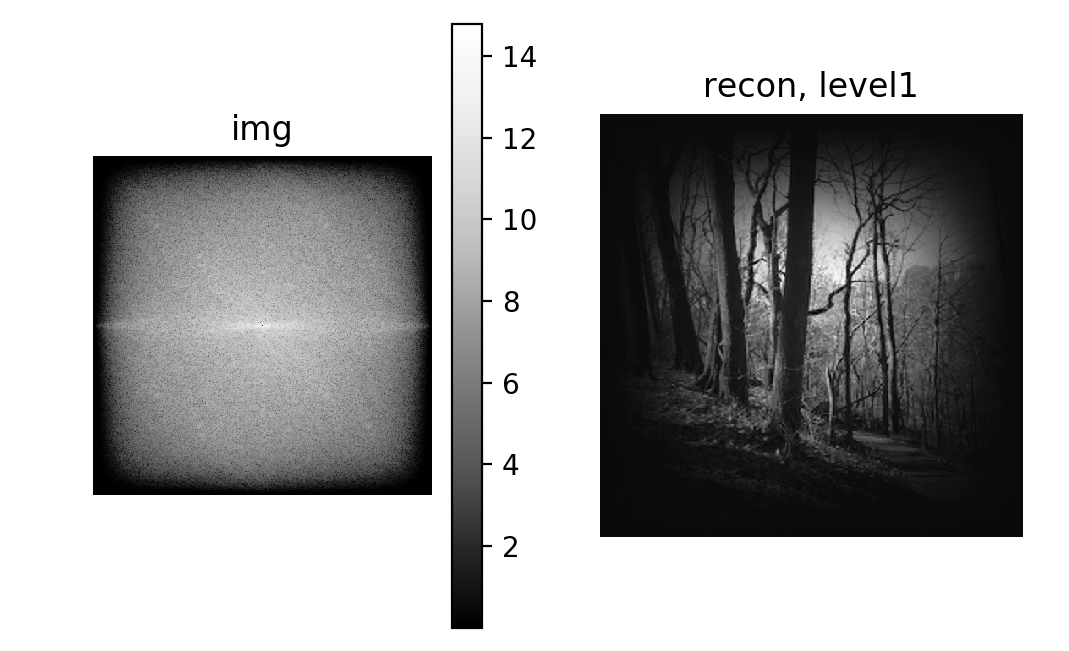

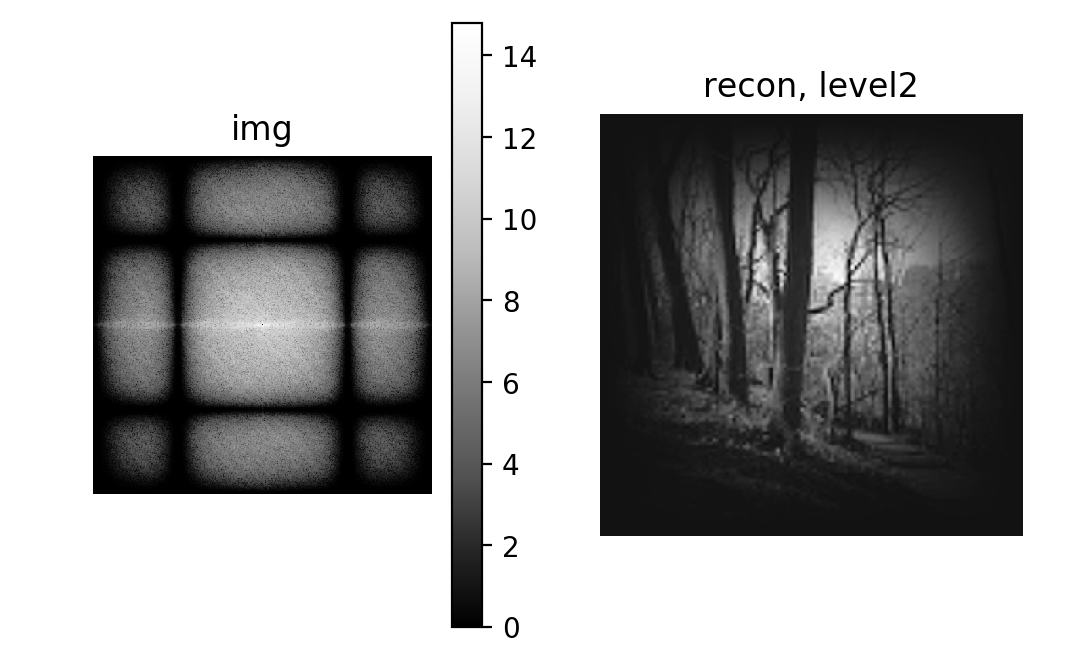

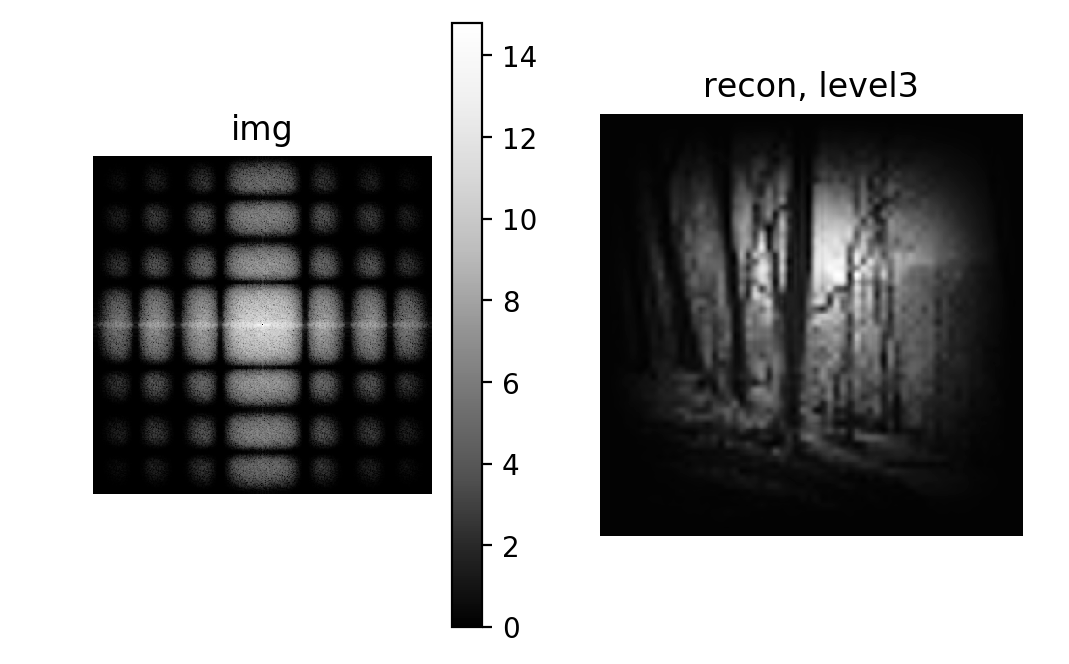

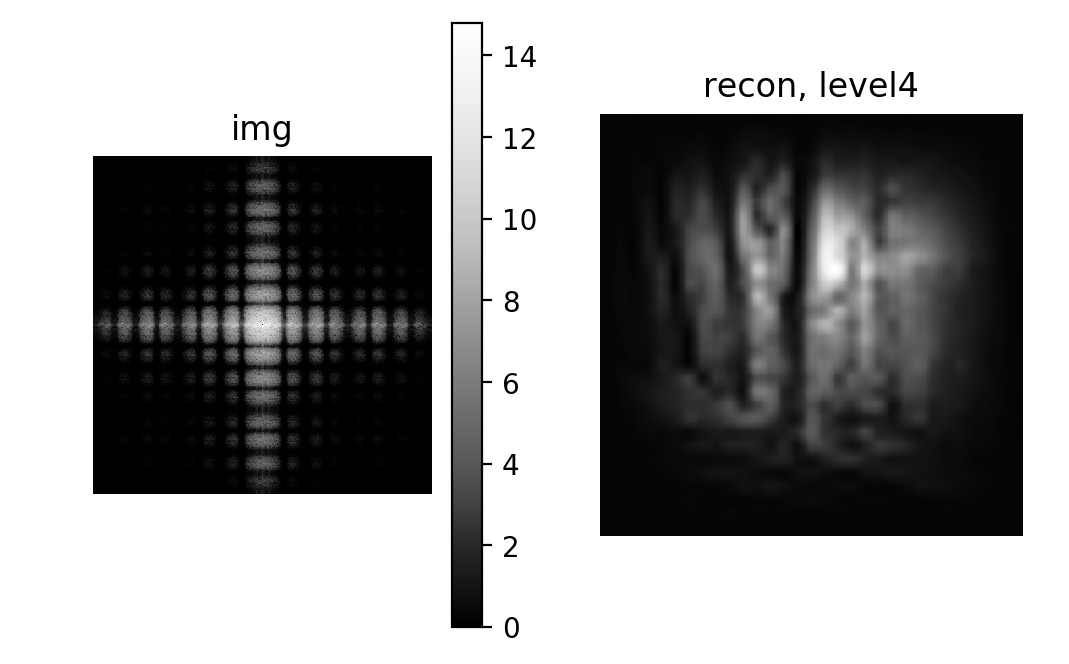

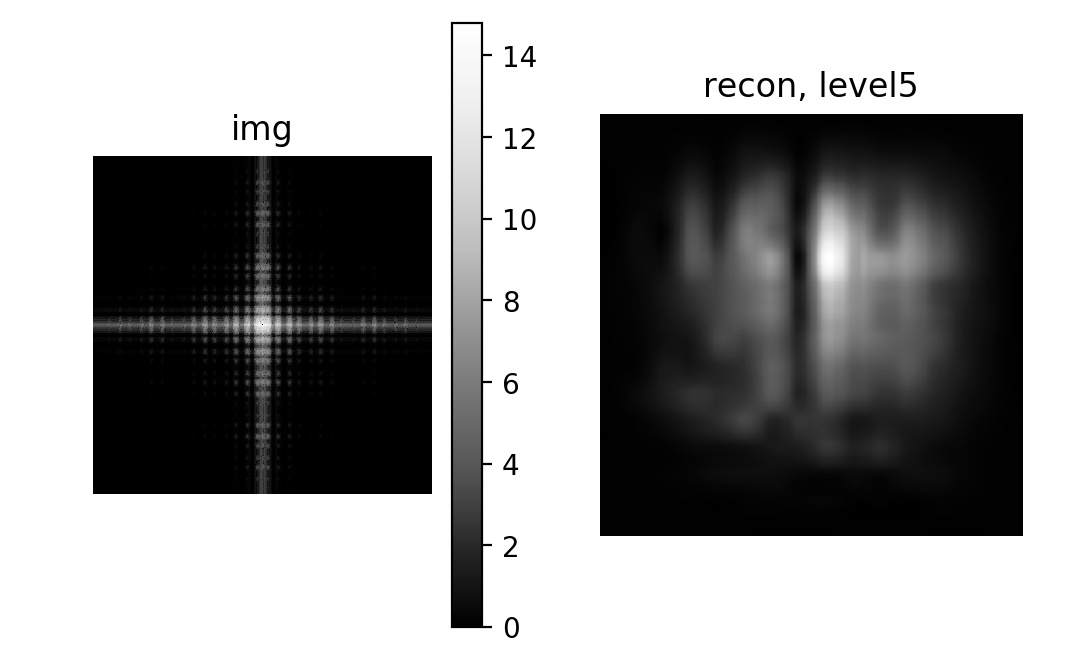

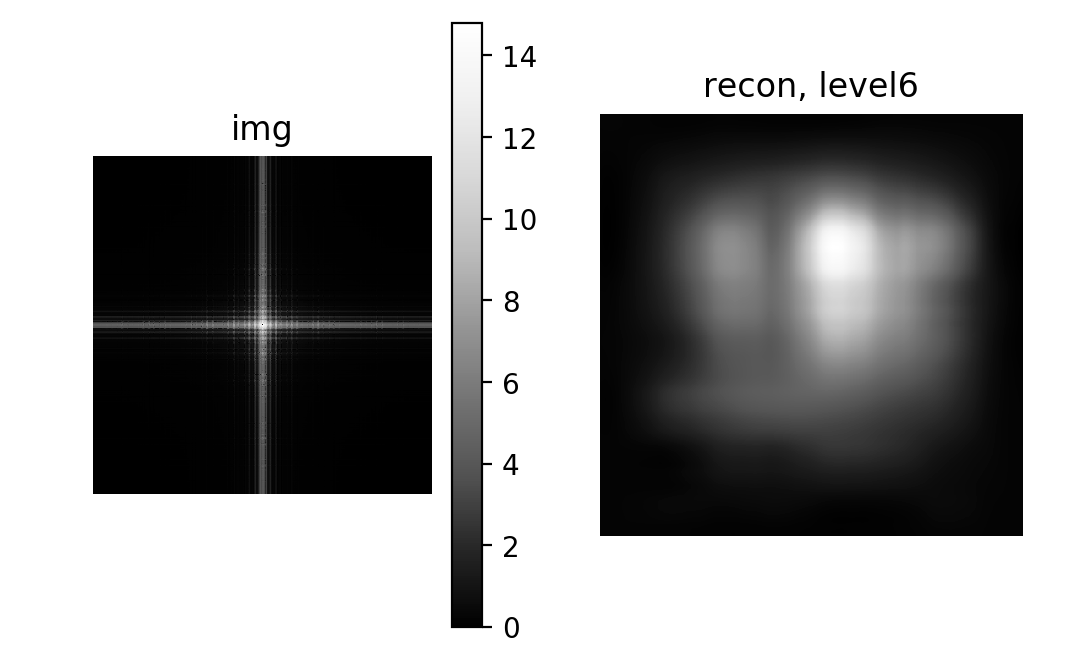

In [58]:
# wavelet = 'gaus1'
wavelet = 'db4'
# wavelet = pywt.ContinuousWavelet(wavelet)
mode = 'smooth'
#level = 6
#im = cos_filter(stim_step)
im = cos_filter(trail_gray_array)
#im_band_coeffs = pywt.wavedec2(im, wavelet, mode, level)
im_band_coeffs = pywt.wavedec2(im, wavelet, mode) #don't specify level and will do max
# im_band_coeffs = pywt.cwt(im, wavelet, level)
for i in range(len(im_band_coeffs)):
    im_band_coeffs_new = [np.zeros_like(i) for i in im_band_coeffs]
    missing_levels = i
    im_band_coeffs_new[:-missing_levels] = im_band_coeffs[:-missing_levels]
    # for i in range(len(im_band_coeffs)):
    #     print (np.array(im_band_coeffs[i]).shape)
    #     im_band_coeffs_new[i] = 
    recon = pywt.waverec2(im_band_coeffs_new, wavelet, mode)
    
    plt.figure()

    plt.subplot(121)
    ft = np.log1p(np.abs(np.fft.fftshift(np.fft.fft2(recon-np.mean(recon)))))
    plt.imshow(ft,cmap='Greys_r');
    plt.axis('off')
    plt.colorbar()
    plt.title('img')
    plt.subplot(122)
    plt.imshow(recon, cmap='Greys_r');
    plt.axis('off')
    plt.title('recon, level'+str(i))
    
    plt.show()


In [9]:
print(ft)

[[-18.19636611 -18.44524171 -18.24351568 ... -18.34959342 -18.25209719
  -17.57234979]
 [        -inf         -inf         -inf ...         -inf         -inf
          -inf]
 [        -inf         -inf         -inf ...         -inf         -inf
          -inf]
 ...
 [        -inf         -inf         -inf ...         -inf         -inf
          -inf]
 [        -inf         -inf         -inf ...         -inf         -inf
          -inf]
 [        -inf         -inf         -inf ...         -inf         -inf
          -inf]]


Text(0.5,1,'recon, level4')

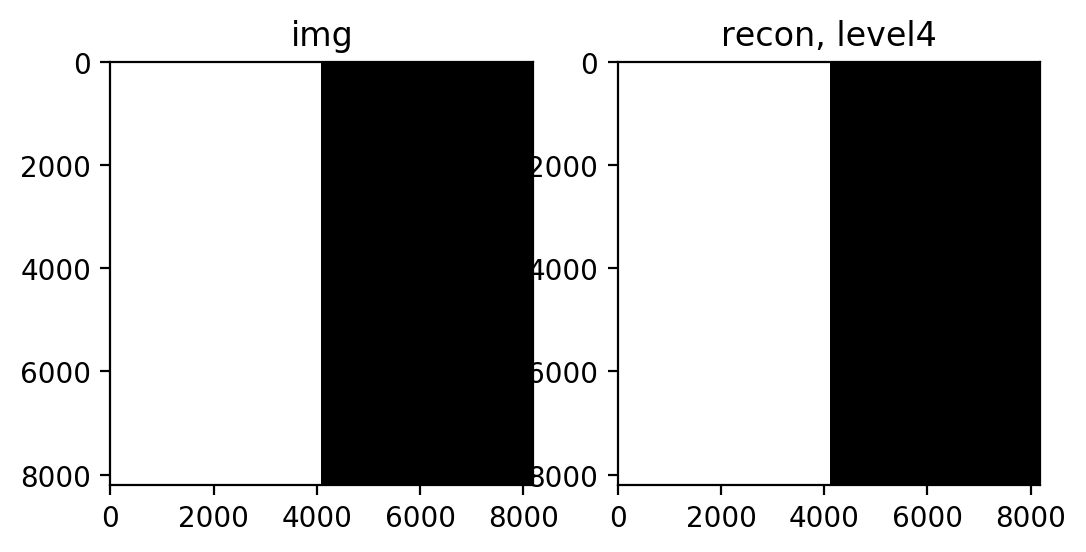

In [4]:
wavelet = 'db4'
mode = 'smooth'
level = 7
im = stim_step
im_band_coeffs = pywt.wavedec2(im, wavelet, mode, level)
im_band_coeffs_new = [np.zeros_like(i) for i in im_band_coeffs]

i = 4
missing_levels = i
im_band_coeffs_new[:-missing_levels] = im_band_coeffs[:-missing_levels]
# for i in range(len(im_band_coeffs)):
#     print (np.array(im_band_coeffs[i]).shape)
#     im_band_coeffs_new[i] = 
recon = pywt.waverec2(im_band_coeffs_new, wavelet, mode)

plt.figure()

plt.subplot(121)
plt.imshow(im,cmap='Greys_r', vmin=0, vmax=1);
# plt.axis('off')
plt.title('img')
plt.subplot(122)
plt.imshow(recon, cmap='Greys_r', vmin=0, vmax=1);
# plt.axis('off')
plt.title('recon, level'+str(i))


In [60]:
##Filter Design:
### equal space in log frequency
### equal width in log frequency

##2D Orientation Design:
###Smooth cuttoff outside frequency circle outside square
### 

##Fourier Design:
###Hard Cuttoff
###Gaussian Taper
###Poission Falloff
###Power Law